In [1]:
# Basic libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Supressing the warnings generated
import warnings
warnings.filterwarnings('ignore')

#
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
# Reading the csv data file.
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

df = pd.concat([test, train])

In [3]:
# Checking the dimensions of the dataset
df.shape

(99999, 172)

In [4]:
# Checking the value counts in dataset
df.dtypes.value_counts()

float64    136
int64       27
object       9
dtype: int64

In [5]:
# Displaying the first 10 field with all columns in the dataset
df.head(10)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.00,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.00,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.00,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.00,0.00,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.00,0.00,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00,NaN
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.00,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.00,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.00,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.00,0.00,0.00,5,4,5,500,500,500,250,250,250,6/19/2014

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

Data pre processing 

In [7]:
# Copy df for EDA processing 
cleaned_df = df.copy()

In [8]:
cleaned_df.head(10)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.00,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.00,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.00,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.00,0.00,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.00,0.00,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00,NaN
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.00,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.00,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.00,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.00,0.00,0.00,5,4,5,500,500,500,250,250,250,6/19/2014

In [9]:
# selecting all the columns with datetime format
date_col= cleaned_df.select_dtypes(include=['object'])

# Converting the selected columns to datetime format
for i in date_col.columns:
    cleaned_df[i] = pd.to_datetime(cleaned_df[i])

cleaned_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    id                        int64         
 1    circle_id                 int64         
 2    loc_og_t2o_mou            float64       
 3    std_og_t2o_mou            float64       
 4    loc_ic_t2o_mou            float64       
 5    last_date_of_month_6      datetime64[ns]
 6    last_date_of_month_7      datetime64[ns]
 7    last_date_of_month_8      datetime64[ns]
 8    arpu_6                    float64       
 9    arpu_7                    float64       
 10   arpu_8                    float64       
 11   onnet_mou_6               float64       
 12   onnet_mou_7               float64       
 13   onnet_mou_8               float64       
 14   offnet_mou_6              float64       
 15   offnet_mou_7              float64       
 16   offnet_mou_8              float64     

In [10]:
## All unique values columns does not contribute anything, so we can drop them.
unique_1_col=[]
for i in cleaned_df.columns:
    if cleaned_df[i].nunique() == 1:
        unique_1_col.append(i)
    else:
        pass
cleaned_df.drop(unique_1_col, axis=1, inplace = True)
print("\n The following all unique features are dropped from the dataset\n",
      unique_1_col)


 The following all unique features are dropped from the dataset
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


Handle Missing values

In [11]:
## features are grouped based on months 6,7,8 so we can deduce that what follow for month 6 is same for rest of 
## the month 7,8 data handling.

In [12]:
# Separate features based on months 6,7,8
month_6_features = cleaned_df.loc[:,['_6' in i for i in cleaned_df.columns]]
month_7_features = cleaned_df.loc[:,['_7' in i for i in cleaned_df.columns]]
month_8_features = cleaned_df.loc[:,['_8' in i for i in cleaned_df.columns]]

In [13]:
month_6_features.isnull().sum().sort_values(ascending=False)

fb_user_6                   74846
count_rech_3g_6             74846
date_of_last_rech_data_6    74846
max_rech_data_6             74846
count_rech_2g_6             74846
total_rech_data_6           74846
av_rech_amt_data_6          74846
arpu_3g_6                   74846
arpu_2g_6                   74846
night_pck_user_6            74846
loc_ic_t2f_mou_6             3937
ic_others_6                  3937
isd_ic_mou_6                 3937
spl_ic_mou_6                 3937
onnet_mou_6                  3937
std_ic_t2f_mou_6             3937
std_ic_t2m_mou_6             3937
std_ic_t2t_mou_6             3937
loc_ic_mou_6                 3937
std_ic_mou_6                 3937
loc_ic_t2m_mou_6             3937
loc_ic_t2t_mou_6             3937
offnet_mou_6                 3937
roam_ic_mou_6                3937
roam_og_mou_6                3937
loc_og_t2t_mou_6             3937
loc_og_t2m_mou_6             3937
loc_og_t2f_mou_6             3937
loc_og_t2c_mou_6             3937
loc_og_mou_6  

In [14]:
month_6_features.head(1)

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,last_day_rch_amt_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
0,91.882,31.78,60.16,0.0,0.0,24.88,18.13,0.0,0.0,43.01,6.9,42.03,0.0,48.93,0.0,0.0,0.0,91.94,30.33,10.21,0.26,40.81,0.0,0.36,0.0,0.36,41.73,0.54,0.0,0.0,5,103,50,2014-06-21,30,NaT,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN


In [15]:
rech_features_6 = ['total_rech_num_6','total_rech_amt_6','max_rech_amt_6','date_of_last_rech_6','last_day_rch_amt_6']
month_6_features[rech_features_6].isnull().sum()

total_rech_num_6          0
total_rech_amt_6          0
max_rech_amt_6            0
date_of_last_rech_6    1607
last_day_rch_amt_6        0
dtype: int64

In [16]:
data_rech_features_6 = ['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6',
                        'vol_2g_mb_6','vol_3g_mb_6','night_pck_user_6','monthly_2g_6','sachet_2g_6','monthly_3g_6','sachet_3g_6','fb_user_6']
month_6_features[data_rech_features_6].head(10)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
0,NaT,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0,0,0,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0,0,0,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0,0,0,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0,0,0,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0,0,0,NaN
5,NaT,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0,0,0,NaN
6,NaT,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0,0,0,NaN
7,NaT,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0,0,0,NaN
8,NaT,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0,0,0,NaN
9,NaT,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0,0,0,NaN


In [17]:
## When vol_2g_mb and vol_3g_mb is equal to 0.0 then the rest of the data recharge fielsd are Null, 
## so we can default to 0.0 when NaN

In [18]:
cleaned_df['total_rech_data_6'] = cleaned_df['total_rech_data_6'].fillna(0)
cleaned_df['max_rech_data_6'] = cleaned_df['max_rech_data_6'].fillna(0)
cleaned_df['count_rech_2g_6'] = cleaned_df['count_rech_2g_6'].fillna(0)
cleaned_df['count_rech_3g_6'] = cleaned_df['count_rech_3g_6'].fillna(0)
cleaned_df['av_rech_amt_data_6'] = cleaned_df['av_rech_amt_data_6'].fillna(0)
##
cleaned_df['total_rech_data_7'] = cleaned_df['total_rech_data_7'].fillna(0)
cleaned_df['max_rech_data_7'] = cleaned_df['max_rech_data_7'].fillna(0)
cleaned_df['count_rech_2g_7'] = cleaned_df['count_rech_2g_7'].fillna(0)
cleaned_df['count_rech_3g_7'] = cleaned_df['count_rech_3g_7'].fillna(0)
cleaned_df['av_rech_amt_data_7'] = cleaned_df['av_rech_amt_data_7'].fillna(0)
##
cleaned_df['total_rech_data_8'] = cleaned_df['total_rech_data_8'].fillna(0)
cleaned_df['max_rech_data_8'] = cleaned_df['max_rech_data_8'].fillna(0)
cleaned_df['count_rech_2g_8'] = cleaned_df['count_rech_2g_8'].fillna(0)
cleaned_df['count_rech_3g_8'] = cleaned_df['count_rech_3g_8'].fillna(0)
cleaned_df['av_rech_amt_data_8'] = cleaned_df['av_rech_amt_data_8'].fillna(0)

In [19]:
# Column values of total_rech_data for each month from 6 to 9 respectively is the sum of the columns values 
# of count_rech_2g for each month from 6 to 9 respectively and count_rech_3g for each month from 6 to 9 respectively,so
# we can drop them.

In [20]:
# Dropping the columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6,7,8 and 9 
cleaned_df.drop(['count_rech_2g_6','count_rech_3g_6',
                   'count_rech_2g_7','count_rech_3g_7',
                   'count_rech_2g_8','count_rech_3g_8'],axis=1, inplace=True)
# Dropping other irrevalent features.
cleaned_df.drop(['monthly_2g_6','sachet_2g_6','monthly_3g_6','sachet_3g_6',
                 'monthly_2g_7','sachet_2g_7','monthly_3g_7','sachet_3g_7',
                 'monthly_2g_8','sachet_2g_8','monthly_3g_8','sachet_3g_8'],axis=1, inplace=True)
# Dropping other irrevalent features.
cleaned_df.drop(['fb_user_6','night_pck_user_6',
                 'fb_user_7','night_pck_user_7',
                 'fb_user_8','night_pck_user_8'],axis=1, inplace=True)

In [21]:
cleaned_df.shape

(99999, 135)

In [22]:
loc_og_features_6=['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_og_mou_6',
                   'loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_mou_6']
month_6_features[loc_og_features_6].head(10)

,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6
0,24.88,18.13,0.00,0.00,43.01,30.33,10.21,0.26,40.81
1,75.51,473.61,0.73,0.00,549.86,19.99,160.19,1.49,181.69
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,5.31,2.94,0.00,0.00,8.26,58.11,487.94,0.00,546.06
4,0.45,2.39,0.00,0.00,2.84,0.00,10.13,0.00,10.13
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,13.13,8.38,14.16,0.00,35.68,6.26,5.33,0.13,11.73
7,0.21,35.86,0.00,0.00,36.08,30.40,28.83,0.00,59.23
8,4.01,34.58,0.00,59.28,38.59,2.78,65.26,1.39,69.44
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Column values of loc_og_mou_6 for each month from 6 to 8 respectively is the sum of the columns values 
# of loc_og_t2t_mou_6, loc_og_t2m_mou_6,loc_og_t2f_mou_6 for each month from 6 to 8 respectively 
# we can drop them.

In [24]:
cleaned_df.drop(['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6',
                 'loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7',
                 'loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8',
                 'loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6',
                 'loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7',
                 'loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8' ],axis=1, inplace=True)

In [25]:
cleaned_df['loc_og_mou_6'] = cleaned_df['loc_og_mou_6'].fillna(0)
cleaned_df['loc_og_mou_7'] = cleaned_df['loc_og_mou_7'].fillna(0)
cleaned_df['loc_og_mou_8'] = cleaned_df['loc_og_mou_8'].fillna(0)
cleaned_df['loc_ic_mou_6'] = cleaned_df['loc_ic_mou_6'].fillna(0)
cleaned_df['loc_ic_mou_7'] = cleaned_df['loc_ic_mou_7'].fillna(0)
cleaned_df['loc_ic_mou_8'] = cleaned_df['loc_ic_mou_8'].fillna(0)

In [26]:
cleaned_df.shape

(99999, 117)

In [27]:
std_og_features_6 = ['std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6',
                    'std_ic_t2f_mou_6','std_ic_mou_6']
month_6_features[std_og_features_6].head(10)

,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6
0,6.90,42.03,0.0,48.93,0.00,0.36,0.00,0.36
1,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
3,0.00,37.09,0.0,37.09,0.00,9.63,0.00,9.63
4,450.48,58.54,0.0,509.03,29.71,13.88,0.00,43.59
5,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
7,0.00,13.71,0.0,13.71,0.00,3.13,7.21,10.34
8,286.06,64.41,0.0,350.48,3.94,2.41,0.00,6.36
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Column values of std_og_mou_6 for each month from 6 to 8 respectively is the sum of the columns values 
# of std_og_t2t_mou_6, std_og_t2m_mou_6,std_og_t2f_mou_6 for each month from 6 to 8 respectively 
# we can drop them.

In [29]:
cleaned_df.drop(['std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6',
                 'std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7',
                 'std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8',
                 'std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6',
                 'std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7',
                 'std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8'],axis=1, inplace=True)

In [30]:
cleaned_df['std_og_mou_6'] = cleaned_df['std_og_mou_6'].fillna(0)
cleaned_df['std_og_mou_7'] = cleaned_df['std_og_mou_7'].fillna(0)
cleaned_df['std_og_mou_8'] = cleaned_df['std_og_mou_8'].fillna(0)
cleaned_df['std_ic_mou_6'] = cleaned_df['std_ic_mou_6'].fillna(0)
cleaned_df['std_ic_mou_7'] = cleaned_df['std_ic_mou_7'].fillna(0)
cleaned_df['std_ic_mou_8'] = cleaned_df['std_ic_mou_8'].fillna(0)

In [31]:
cleaned_df.shape

(99999, 99)

In [32]:
# Checking the correlation between the above mentioned columns in tabular for months 6,7,8 and 9
print("Correlation table for month 6\n\n", cleaned_df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", cleaned_df[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", cleaned_df[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())

Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.932232            0.809695
arpu_2g_6            0.932232   1.000000            0.834065
av_rech_amt_data_6   0.809695   0.834065            1.000000

Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000   0.930366            0.796131
arpu_2g_7            0.930366   1.000000            0.815933
av_rech_amt_data_7   0.796131   0.815933            1.000000

Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.924925            0.787165
arpu_2g_8            0.924925   1.000000            0.805482
av_rech_amt_data_8   0.787165   0.805482            1.000000


In [33]:
#From the above correlation table between attributes arpu_2g_* and arpu_3g_* for each month from 6 to 9 respectively is highly correlated to the attribute av_rech_amt_data_* for each month from 6 to 9 respectively.
#Considering the high correlation between them, it is safer to drop the attributes arpu_2g_* and arpu_3g_*.

In [34]:
# Dropping the columns 'arpu_3g_*'&'arpu_2g_*' in month 6,7,8 and 9 datafrom the dataset
cleaned_df.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8'],axis=1, inplace=True)

In [35]:
cleaned_df.shape

(99999, 93)

In [36]:
# Dropping date features as they are irrelevant
cleaned_df.drop(['date_of_last_rech_6','date_of_last_rech_data_6',
                  'date_of_last_rech_7','date_of_last_rech_data_7',
                  'date_of_last_rech_8','date_of_last_rech_data_8'],axis=1, inplace=True)

In [37]:
cleaned_df.shape

(99999, 87)

In [38]:
## Defaulting other NA values to zero

In [39]:
NA_features=[features for features in cleaned_df.columns if cleaned_df[features].isnull().sum()>1]
cleaned_df[NA_features] = cleaned_df[NA_features].fillna(0)

In [40]:
cleaned_df.isnull().sum().sort_values(ascending=False)

id                    0
total_rech_num_6      0
max_rech_amt_8        0
max_rech_amt_7        0
max_rech_amt_6        0
total_rech_amt_8      0
total_rech_amt_7      0
total_rech_amt_6      0
total_rech_num_8      0
total_rech_num_7      0
ic_others_8           0
last_day_rch_amt_7    0
ic_others_7           0
ic_others_6           0
isd_ic_mou_8          0
isd_ic_mou_7          0
isd_ic_mou_6          0
spl_ic_mou_8          0
spl_ic_mou_7          0
spl_ic_mou_6          0
last_day_rch_amt_6    0
last_day_rch_amt_8    0
total_ic_mou_7        0
vol_2g_mb_7           0
jun_vbc_3g            0
jul_vbc_3g            0
aug_vbc_3g            0
aon                   0
vol_3g_mb_8           0
vol_3g_mb_7           0
vol_3g_mb_6           0
vol_2g_mb_8           0
vol_2g_mb_6           0
total_rech_data_6     0
av_rech_amt_data_8    0
av_rech_amt_data_7    0
av_rech_amt_data_6    0
max_rech_data_8       0
max_rech_data_7       0
max_rech_data_6       0
total_rech_data_8     0
total_rech_data_

In [41]:
# High-value customers : Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of 
# the average recharge amount in the first two months (the good phase)

In [42]:
# lets dervie features to extract high value customers
# lets find out total amount spent by customers on data recharge,we have two colums available to find this out 
# first column is av_rech_amt_data_x (x represents month here, would be either 6 or 7 or 8)
# second column is total_rech_data_x (x represnts month here, would be either 6 or 7 or 8)
# lets introduce a new column total_rech_data_amt_x which can be calculated as av_rech_amt_data_x * total_rech_data_x
#del filtered_df
filtered_df = cleaned_df.copy()
filtered_df['total_rech_data_amt_6'] = cleaned_df['av_rech_amt_data_6'] * cleaned_df['total_rech_data_6']
filtered_df['total_rech_data_amt_7'] = cleaned_df['av_rech_amt_data_7'] * cleaned_df['total_rech_data_7']
filtered_df['total_rech_data_amt_8'] = cleaned_df['av_rech_amt_data_8'] * cleaned_df['total_rech_data_8']

# now we dont need columns av_rech_amt_data_x,total_rech_data_x (x = 6/7/8) , lets drop them
filtered_df.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'],axis = 1,inplace = True)

In [43]:
# lets find out the average recharge done in the first two months(june & july) - the good phase
# total amount spend would be the sum of total data recharge done & total call/sms recharges
filtered_df_temp = (filtered_df['total_rech_amt_6'].fillna(0) 
+ filtered_df['total_rech_amt_7'].fillna(0) 
+ filtered_df['total_rech_data_amt_6'].fillna(0) 
+ filtered_df['total_rech_data_amt_7'].fillna(0))/2

# take 70 percentile of the calculated average amount
filtered_df70= np.percentile(filtered_df_temp, 70.0)
print("70 percentile is : ",filtered_df70 )

# fitler the given data set based on 70th percentile
filtered_df = filtered_df[filtered_df_temp >= filtered_df70]

print("Dimensions of the filtered dataset:",filtered_df.shape)

70 percentile is :  478.0
Dimensions of the filtered dataset: (30001, 84)


In [44]:
## Defining Churn variable based on data and mou usage.

In [45]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']
filtered_df[churn_col].head()
# Define new column "Churn" and initialize it 
filtered_df['churn']=0
# Imputing the churn values based on the condition
filtered_df['churn'] = np.where(filtered_df[churn_col].sum(axis=1) == 0, 1, 0)

In [46]:
# change data type to category
filtered_df.churn = filtered_df.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(filtered_df.churn.value_counts()*100/filtered_df.shape[0])

Churn Ratio:
0    94.636845
1     5.363155
Name: churn, dtype: float64


In [47]:
# There is class imbalance as 94% of the customers do not churn.

In [48]:
# creating a new variable 'tenure'
filtered_df['tenure'] = (filtered_df['aon']/30).round(0)

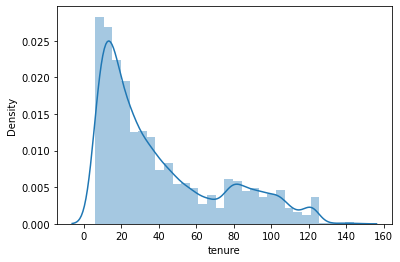

In [49]:
sns.distplot(filtered_df['tenure'],bins=30)
plt.show()

In [ ]:
## From the above plot , its clear tenured customers do no churn and they keep availing telecom services

In [52]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(filtered_df[['tenure_range']], drop_first=True)
dummy.head()

,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
1,0,0,0,0
2,1,0,0,0
21,0,1,0,0
23,1,0,0,0
26,0,0,1,0


In [53]:
# Adding the results to the master dataframe
filtered_df = pd.concat([filtered_df, dummy], axis=1)
filtered_df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,tenure,tenure_range,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
1,70000,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,549.86,639.29,397.11,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,181.69,149.24,187.43,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.0,0.0,114.63,177.88,94.23,0.00,0.00,0.00,5,4,5,500,500,500,250,250,250,250,0,0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,2533,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,84.0,NaN,0,0,0,0
2,70001,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6,9,5,500,1000,1000,300,500,500,0,0,0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,277,525.61,758.41,241.84,0.0,0.0,0.0,0.0,1,9.0,6-12 Months,1,0,0,0
21,70020,452.601,369.418,372.545,1115.79,843.44,689.38,15.04,30.24,27.79,0.00,0.00,15.61,0.00,0.00,43.31,0.0,0.0,0.0,5.91,8.01,1.21,1124.93,865.68,672.64,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,1130.84,873.69,673.86,32.91,15.88,7.94,28.43,19.53,0.35,61.34,35.41,8.29,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,9,7,4,626,496,436,250,250,200,110,0,200,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,495,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,16.0,1-2 Yrs,0,1,0,0
23,70022,1128.470,865.521,967.308,392.53,264.48,433.03,203.98,328.98,411.16,32.08,0.00,0.00,93.51,0.00,0.00,0.0,0.0,0.0,450.88,579.44,811.31,50.68,10.66,25.53,0.0,0.0,0.0,1.43,4.53,7.35,0.0,0.0,0.0,502.99,594.64,844.19,802.38,1087.54,1587.16,178.79,100.09,178.56,1003.84,1197.11,1774.98,0.16,0.0,0.0,10.43,8.58,4.79,12.06,0.88,4.45,17,17,17,1246,1020,1150,200,120,150,30,110,20,0.0,25.0,0.0,0.0,197.99,0.00,0.0,0.0,0.00,203,0.00,0.00,0.00,0.0,0.0,100.0,0.0,0,7.0,6-12 Months,1,0,0,0
26,70025,153.341,846.059,780.380,125.86,1886.56,1490.18,20.54,119.58,64.28,19.28,2.39,0.00,80.29,55.84,0.00,0.0,0.0,0.0,14.71,119.54,40.66,51.39,1830.74,1513.79,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,66.11,1950.29,1554.46,17.55,55.26,42.83,7.15,19.08,35.84,24.70,114.61,117.81,0.00,0.0,0.0,0.00,40.26,39.13,0.00,0.00,0.00,6,7,15,260,814,922,150,229,229,150,229,17,0.0,0.0,25.0,0.0,0.00,199.34,0.0,0.0,322.22,1163,185.39,0.00,0.00,0.0,0.0,0.0,1001.0,0,39.0,2-5 Yrs,0,0,1,0


In [54]:
model_df=filtered_df[:].copy()

# Dropping unwanted columns
model_df.drop(['tenure','tenure_range'], axis=1, inplace=True)
model_df.head(5)

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
1,70000,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,549.86,639.29,397.11,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,181.69,149.24,187.43,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.0,0.0,114.63,177.88,94.23,0.00,0.00,0.00,5,4,5,500,500,500,250,250,250,250,0,0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,2533,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0
2,70001,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6,9,5,500,1000,1000,300,500,500,0,0,0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,277,525.61,758.41,241.84,0.0,0.0,0.0,0.0,1,1,0,0,0
21,70020,452.601,369.418,372.545,1115.79,843.44,689.38,15.04,30.24,27.79,0.00,0.00,15.61,0.00,0.00,43.31,0.0,0.0,0.0,5.91,8.01,1.21,1124.93,865.68,672.64,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,1130.84,873.69,673.86,32.91,15.88,7.94,28.43,19.53,0.35,61.34,35.41,8.29,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,9,7,4,626,496,436,250,250,200,110,0,200,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,495,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0,0,1,0,0
23,70022,1128.470,865.521,967.308,392.53,264.48,433.03,203.98,328.98,411.16,32.08,0.00,0.00,93.51,0.00,0.00,0.0,0.0,0.0,450.88,579.44,811.31,50.68,10.66,25.53,0.0,0.0,0.0,1.43,4.53,7.35,0.0,0.0,0.0,502.99,594.64,844.19,802.38,1087.54,1587.16,178.79,100.09,178.56,1003.84,1197.11,1774.98,0.16,0.0,0.0,10.43,8.58,4.79,12.06,0.88,4.45,17,17,17,1246,1020,1150,200,120,150,30,110,20,0.0,25.0,0.0,0.0,197.99,0.00,0.0,0.0,0.00,203,0.00,0.00,0.00,0.0,0.0,100.0,0.0,0,1,0,0,0
26,70025,153.341,846.059,780.380,125.86,1886.56,1490.18,20.54,119.58,64.28,19.28,2.39,0.00,80.29,55.84,0.00,0.0,0.0,0.0,14.71,119.54,40.66,51.39,1830.74,1513.79,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,66.11,1950.29,1554.46,17.55,55.26,42.83,7.15,19.08,35.84,24.70,114.61,117.81,0.00,0.0,0.0,0.00,40.26,39.13,0.00,0.00,0.00,6,7,15,260,814,922,150,229,229,150,229,17,0.0,0.0,25.0,0.0,0.00,199.34,0.0,0.0,322.22,1163,185.39,0.00,0.00,0.0,0.0,0.0,1001.0,0,0,0,1,0


In [55]:
## Test Train data split

In [56]:
# Import library
from sklearn.model_selection import train_test_split
# Putting feature variables into X and y
X = model_df.drop(['churn'], axis=1)
y = model_df['churn']
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [57]:
##Feature scaling

In [58]:
# Standardization method
from sklearn.preprocessing import StandardScaler
# Instantiate the Scaler
scaler = StandardScaler()
# Fit the data into scaler and transform
X_train = scaler.fit_transform(X_train)

In [59]:
##Model with PCA

In [60]:
#Import PCA
from sklearn.decomposition import PCA
# Instantiate PCA
pca = PCA(random_state=42)
# Fit train set on PCA
pca.fit(X_train)
# Principal components
pca.components_
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.12315078 0.21245005 0.27608226 0.32355209 0.36417557 0.40098254
 0.4332035  0.46319653 0.49155433 0.51870056 0.54331711 0.56702719
 0.58886451 0.60737477 0.62550478 0.6425551  0.65878329 0.67424699
 0.6886934  0.7030349  0.71649408 0.72871149 0.74036626 0.75191283
 0.76302549 0.77391627 0.78455651 0.79510761 0.80545537 0.81558297
 0.82496946 0.83433394 0.84301491 0.85152084 0.85988773 0.86733704
 0.8745826  0.88173313 0.88867075 0.89493151 0.90083306 0.90644115
 0.91171587 0.91674487 0.92164998 0.9259426  0.9301878  0.93420526
 0.93809793 0.9419593  0.94566183 0.94915512 0.95264142 0.95592606
 0.95917794 0.96224843 0.96518621 0.96791925 0.97063063 0.97319096
 0.97566848 0.97805548 0.98039607 0.98265472 0.98474542 0.9867582
 0.98857934 0.99026853 0.99186372 0.99326701 0.99464429 0.99589675
 0.99688617 0.99776029 0.99843521 0.9990158  0.99942754 0.99976869
 0.99999561 0.99999838 0.99999937 1.         1.         1.
 1.         1.         1.         1.        ]


Text(0, 0.5, 'Cumulative Variance')

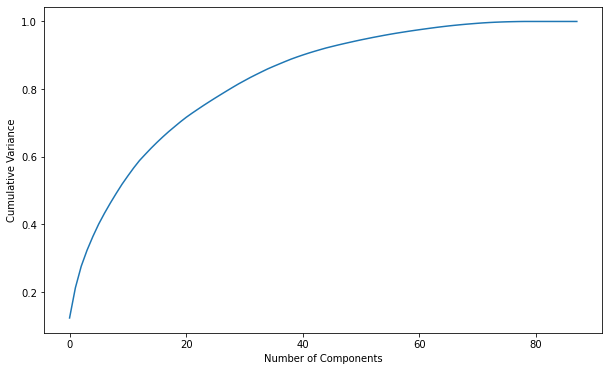

In [61]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

In [62]:
#We can see that 60 components explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.

In [63]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

In [64]:
##Logistic regression with PCA

In [65]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [66]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [67]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.9074469037555444 at C = 10


In [68]:
##Logistic regression with optimal C

In [69]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [70]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [71]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[19677   170]
 [   80  1073]]


In [72]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [73]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9880952380952381
Sensitivity:- 0.9306157849089333
Specificity:- 0.9914344737239885


In [74]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[2695 5850]
 [   0  456]]


In [75]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.3500722141984224
Sensitivity:- 1.0
Specificity:- 0.31538911644236395


In [ ]:
## Logistic regression model with PCA seems to have overfitted.

In [88]:
##Decision tree with PCA

In [89]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [91]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [92]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [93]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [94]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[19679   168]
 [  549   604]]


In [95]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [96]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9658571428571429
Sensitivity:- 0.5238508239375542
Specificity:- 0.9915352446213533


In [97]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [98]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[8530   15]
 [ 445   11]]


In [99]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [100]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9488945672703033
Sensitivity:- 0.02412280701754386
Specificity:- 0.9982445874780573


In [ ]:
## Decision tree with PCA does not work as it have low sensitivity

In [101]:
##Logistic regression with No PCA

In [144]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [145]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.9724036884550353 at C = 10


In [146]:
# Instantiate the model with best C
logistic= LogisticRegression(C=best_C)

In [147]:
# Fit the model on the train set
log_model = logistic.fit(X_train, y_train)
# Predictions on the train set
y_train_pred = log_model.predict(X_train)

In [148]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[19715   132]
 [   17  1136]]


In [150]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [151]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.992904761904762
Sensitivity:- 0.9852558542931483
Specificity:- 0.9933491207739205


In [ ]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

In [152]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9488945672703033
Sensitivity:- 0.9852558542931483
Specificity:- 0.9933491207739205


In [ ]:
## We can go for simple logistic regression without PCA as the sensitivity and accuracy are good.

In [184]:
#pred = log_model.predict(y_test)
#pred = pd.DataFrame(pred,columns=[churn])

submission = model_df[["id","churn"]].copy(30000)
submission.to_csv("predictions.csv", index = False)